# Sales Analysis
In this caseStudy I used Python Pandas & Python Matplotlib to analyze and answer business questions about 4 years                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  worth of sales data.

### Importing requied libraries

In [47]:
# Data Manipulation
import pandas as pd

# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import matplotlib.font_manager
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
style.use('ggplot')

# change default params in matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [48]:
# Read dataset
sales=pd.read_excel('superstore_sales.xlsx')

#### Check first 5 rows of dataset

In [49]:
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [50]:
# last five rows of dataset
sales.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [51]:
# Shape od dataset
sales.shape

(51290, 21)

#### > There are 51290 rows and 21 columns which is exactly same we had it in excel.

- <h4> Lets check how many columns present in dataset

In [52]:
sales.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [53]:
# Summary of dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

####  Checking any missing values

In [54]:
sales.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

#### > no null values found

In [55]:
# Getting descriptive statistics summary
sales.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


# Exploratory Data Analysis(EDA)

#### Q1. What is the  overall sales trend? 

In [56]:
sales['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [57]:
sales['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [58]:
#getting month year from dataset
sales['month_year'] = sales['order_date'].apply(lambda x: x.strftime('%y-%m'))

In [59]:
sales['month_year']

0        11-01
1        11-01
2        11-01
3        11-01
4        11-01
         ...  
51285    14-12
51286    14-12
51287    14-12
51288    14-12
51289    14-12
Name: month_year, Length: 51290, dtype: object

In [60]:
sales.groupby('month_year').sum()

,sales,quantity,discount,profit,shipping_cost,year
month_year,,,,,,
11-01,98898.48886,1463,68.758,8321.80096,10544.78800,870763
11-02,91152.15698,1224,52.252,12417.90698,10681.16300,760158
11-03,145729.36736,1836,74.212,15303.56826,13096.18550,1083929
11-04,116915.76418,2020,80.782,12902.32438,12954.52000,1134204
11-05,146747.83610,2013,82.382,12183.82870,16443.20600,1138226
11-06,215207.38022,3112,159.534,23415.24702,23813.10900,1844087
11-07,115510.41912,1774,80.086,5585.00352,11844.47600,995445
11-08,207581.49122,3035,121.462,23713.66772,22001.13600,1765658
11-09,290214.45534,3707,137.678,35776.88394,29664.85100,2115572


In [61]:
sales_trend=sales.groupby('month_year').sum()['sales'].reset_index()
sales_trend.head(10)

,month_year,sales
0,11-01,98898.48886
1,11-02,91152.15698
2,11-03,145729.36736
3,11-04,116915.76418
4,11-05,146747.83610
5,11-06,215207.38022
6,11-07,115510.41912
7,11-08,207581.49122
8,11-09,290214.45534
9,11-10,199071.26404


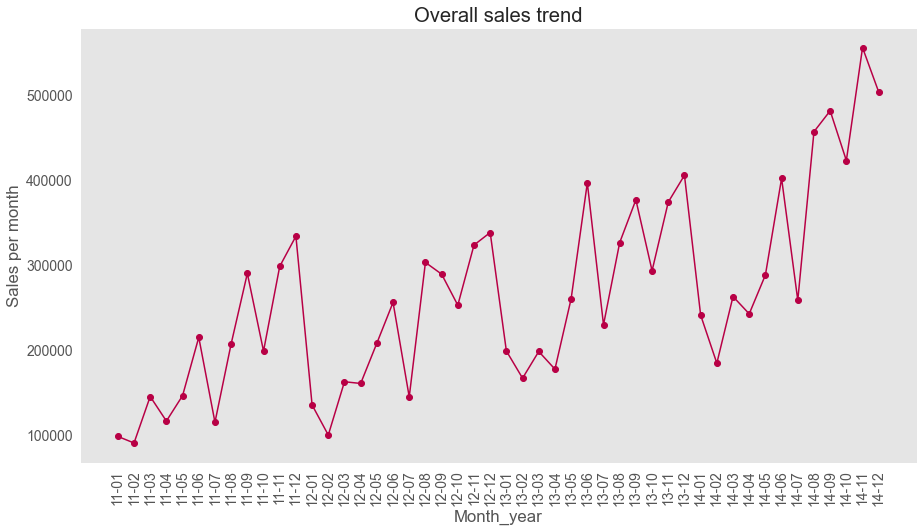

In [62]:
# setting figure size
plt.figure(figsize=(15,8))
plt.plot(sales_trend['month_year'], sales_trend['sales'], marker='o', color='#b80045')
plt.xticks(rotation=90)
plt.xlabel('Month_year')
plt.ylabel('Sales per month')
plt.title('Overall sales trend')
plt.grid()
plt.show()

In [63]:
sales_profit=sales.groupby('month_year').sum()['profit'].reset_index()
sales_profit.head(10)

,month_year,profit
0,11-01,8321.80096
1,11-02,12417.90698
2,11-03,15303.56826
3,11-04,12902.32438
4,11-05,12183.82870
5,11-06,23415.24702
6,11-07,5585.00352
7,11-08,23713.66772
8,11-09,35776.88394
9,11-10,25963.41834


### Profit per month

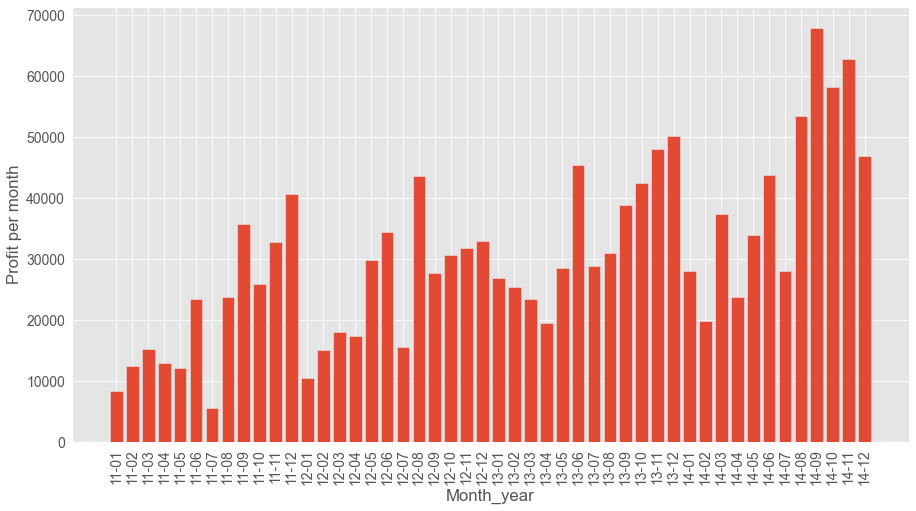

In [64]:
plt.figure(figsize=(15,8))
plt.bar(sales_profit['month_year'],sales_profit['profit'])
plt.xticks(rotation=90)
plt.xlabel('Month_year')
plt.ylabel('Profit per month')
plt.show()

### What are the top 10 products by sales?

In [65]:
# Grouping products by sales
prod_sale=pd.DataFrame(sales.groupby('product_name').sum()['sales'])

# Sorting prod_sale column
prod_sales=prod_sale.sort_values(['sales'], ascending=False)

# Top 10 products by sales
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


#### Which are the most selling products?

In [66]:
Most_selling_prod=pd.DataFrame(sales.groupby('product_name').sum()['quantity'])
Most_selling_prod=Most_selling_prod.sort_values('quantity', ascending=False)
Most_selling_prod[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


<AxesSubplot:xlabel='product_name'>

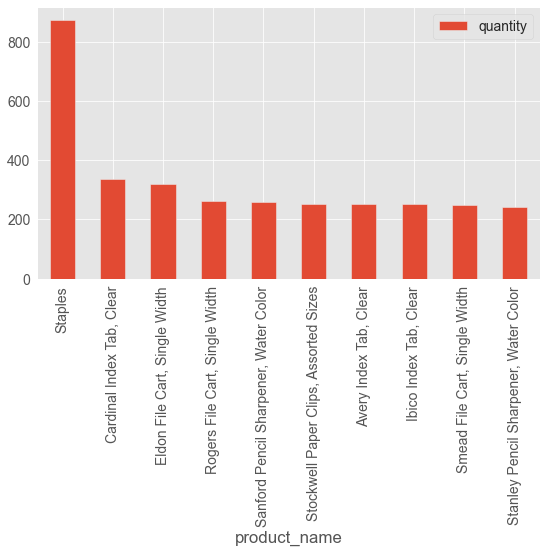

In [67]:
Most_selling_prod=pd.DataFrame(sales.groupby('product_name').sum()['quantity'])
Most_selling_prod=Most_selling_prod.sort_values('quantity', ascending=False)
Most_selling_prod[:10].plot(kind='bar')

#### > Steples are most selling products.

#### What is the most preferred ship mode

<AxesSubplot:xlabel='ship_mode', ylabel='count'>

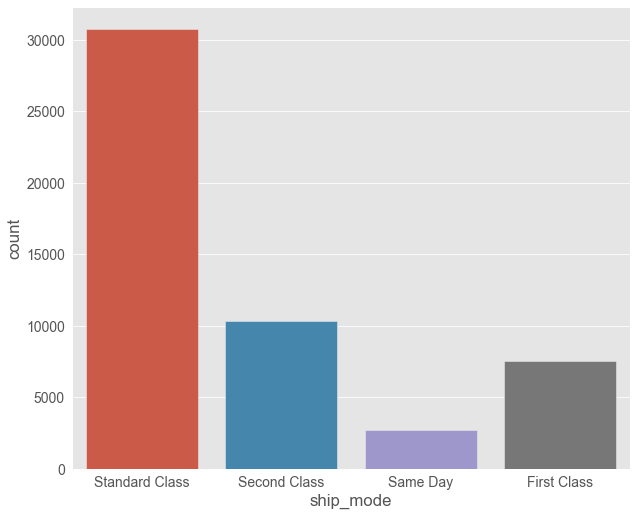

In [68]:
plt.figure(figsize=(10,8.5))
sns.countplot(sales['ship_mode'])

#### > Standard class is the most preferred ship mode

### WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [69]:
category=pd.DataFrame(sales.groupby(['category', 'sub_category']).sum()['profit'])
category=category.sort_values(['category','profit'], ascending=False)
category

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

# Conclusion
- From above analysis if we carefully observe the data we conclude that, In the initial four months the sales are quite low
- From month of June to December sales get increasing (great sales amount from June to December). 
- Sales are too higher in the months of November and December. 
- most sales products are from technology category. 
- Standard class is the most preferred ship mode of all the people out of 51 thousand records we have for over four years.

# Result

In the light of evidence, we conclude that Initial four months sales are not that much high but after months sales are increasing drastically. so if we see overall pattern which means sales are increasing and profit are also increasing and company is growing.

#  Thank You